In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

## LOADING DATA

In [3]:
#this loads the data from all the csv files
listings_data = pd.read_csv("listings_data0-9.csv") #these two are not named like the others
listings_data.append(pd.read_csv("listings_data9-10.csv"))

def read_in_data(my_df):
    i = 10
    for i in range(10,290,10):
        current_df = (pd.read_csv("listings_data"+str(i)+"-"+str(i+10)+".csv"))
        my_df = my_df.append(current_df)
    #listings_data.append(current_df)
    return my_df

In [4]:
all_listings_data = read_in_data(listings_data)

In [5]:
all_listings_data.head(2)

,Unnamed: 0,address,beds_baths,building_desc,building_dets,ext_sq_ft,extras,monthly_main,monthly_tax,neighb,price,sq_ft
0,0,"432 Park Avenue, PH95 - Midtown, New York",6 Beds | 8 Baths,"This spectacular full floor, 8,255 square foot...","['Central Laundry', 'Concierge', 'Full Time Do...",NaN,"Condo, Doorman","17,182","15,108",Midtown,"82,000,000",8255
1,1,"520 Park Avenue, 52 - Upper East Side, New York",6 Beds | 8 Baths,The Duplex Penthouse is an incredible home in ...,"['Central Laundry', 'Concierge', 'Full Time Do...",NaN,"Condo, Doorman","14,514","17,630",Upper East Side,"73,000,000",9256


In [6]:
all_listings_data.shape

(8552, 12)

In [7]:
all_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 0 to 233
Data columns (total 12 columns):
Unnamed: 0       8552 non-null int64
address          8552 non-null object
beds_baths       8304 non-null object
building_desc    8520 non-null object
building_dets    7938 non-null object
ext_sq_ft        338 non-null object
extras           8512 non-null object
monthly_main     8039 non-null object
monthly_tax      4388 non-null object
neighb           8543 non-null object
price            8552 non-null object
sq_ft            5744 non-null object
dtypes: int64(1), object(11)
memory usage: 868.6+ KB


## CLEANING DATA

In [8]:
#deleting random columns
all_listings_data.reset_index(inplace=True)
all_listings_data.drop("index",axis=1,inplace=True)
all_listings_data.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
all_listings_data.head(2)

,address,beds_baths,building_desc,building_dets,ext_sq_ft,extras,monthly_main,monthly_tax,neighb,price,sq_ft
0,"432 Park Avenue, PH95 - Midtown, New York",6 Beds | 8 Baths,"This spectacular full floor, 8,255 square foot...","['Central Laundry', 'Concierge', 'Full Time Do...",NaN,"Condo, Doorman","17,182","15,108",Midtown,"82,000,000",8255
1,"520 Park Avenue, 52 - Upper East Side, New York",6 Beds | 8 Baths,The Duplex Penthouse is an incredible home in ...,"['Central Laundry', 'Concierge', 'Full Time Do...",NaN,"Condo, Doorman","14,514","17,630",Upper East Side,"73,000,000",9256


In [11]:
all_listings_data = all_listings_data.drop_duplicates()

In [12]:
all_listings_data.shape

(8454, 11)

In [13]:
all_listings_data["extras"] = all_listings_data["extras"].apply(lambda x: str(x).strip())

In [14]:
#get rid of commercial/ multifamily listings
all_listings_data = all_listings_data[(all_listings_data["extras"]!="Commercial") & (all_listings_data["extras"] != "Commercial, Doorman") & (all_listings_data["extras"] != "Multi-Family") & (all_listings_data["extras"] != "Multi-Family, Doorman") & (all_listings_data["extras"] !="Land")]
all_listings_data["extras"].unique() 

array(['Condo, Doorman', 'Single Family Townhouse',
       'Cooperative, Doorman', 'Condo',
       'Single Family Townhouse, Doorman', 'Condo/Cooperative', 'Doorman',
       'Cooperative', 'nan', 'Condo/Cooperative, Doorman', 'House'],
      dtype=object)

In [15]:
all_listings_data.shape

(8145, 11)

In [16]:
all_listings_data.neighb.value_counts()

Upper East Side                        1565
Upper West Side                         956
Midtown                                 536
Financial District                      414
Chelsea                                 382
TriBeCa                                 353
Gramercy - Union Square                 324
Murray Hill                             319
Greenwich Village                       274
SoHo - Nolita                           235
Clinton                                 223
Sutton Area                             219
West Village - Meatpacking District     215
Flatiron District                       200
Harlem                                  195
Turtle Bay                              194
Carnegie Hill                           185
Lower East Side                         184
East Village                            168
Long Island City                        156
Lincoln Square                          134
Battery Park City                       126
Central Park South              

In [17]:
#remove LIC, Roosevelt Island & Riverdale listings
all_listings_data = all_listings_data[(all_listings_data["neighb"] != "Long Island City") & (all_listings_data["neighb"] != "Riverdale") & (all_listings_data["neighb"] != "Roosevelt Island")]

In [18]:
#convert price, sqft, maintenance, and taxes to numbers
all_listings_data["price"] = all_listings_data["price"].apply(lambda x: int(str(x).replace(",","")))
all_listings_data["sq_ft"] = all_listings_data["sq_ft"].apply(lambda x: float(str(x).replace(",","")))
all_listings_data["monthly_main"] = all_listings_data["monthly_main"].apply(lambda x: float(str(x).replace(",","")))
all_listings_data["monthly_tax"] = all_listings_data["monthly_tax"].apply(lambda x: float(str(x).replace(",","")))

In [19]:
all_listings_data["monthly_main"] = all_listings_data["monthly_main"].fillna(0)
all_listings_data["monthly_tax"] = all_listings_data["monthly_tax"].fillna(0)

In [20]:
#need to create a term that is comparable between condos and coops since coops don't have tax
all_listings_data["monthly_fees"] = all_listings_data["monthly_main"] + all_listings_data["monthly_tax"]

In [21]:
#get some additional columns
all_listings_data["ph"] = all_listings_data["address"].apply(lambda x: "PH" in x) #penthouse
all_listings_data["price_sq_ft"] = all_listings_data["price"]/all_listings_data["sq_ft"] #$PSF

In [22]:
#get beds, baths columns
import re

beds_match = re.compile(r'\d\d? Beds?')

def get_beds(phrase):
    try:
        return int(beds_match.search(phrase).group().split(" ")[0])
    except:
        return 0
    
baths_match = re.compile(r'\d\d? Baths?')

def get_baths(phrase):
    try:
        return int(baths_match.search(phrase).group().split(" ")[0])
    except:
        return 0

In [23]:
all_listings_data["beds"] = all_listings_data["beds_baths"].apply(lambda x: get_beds(x))

In [24]:
all_listings_data["baths"] = all_listings_data["beds_baths"].apply(lambda x: get_baths(x))

In [25]:
all_listings_data.columns

Index(['address', 'beds_baths', 'building_desc', 'building_dets', 'ext_sq_ft',
       'extras', 'monthly_main', 'monthly_tax', 'neighb', 'price', 'sq_ft',
       'monthly_fees', 'ph', 'price_sq_ft', 'beds', 'baths'],
      dtype='object')

In [27]:
#get rid of some outliers
all_listings_data = all_listings_data[all_listings_data["monthly_main"]<50000]
all_listings_data = all_listings_data[all_listings_data["sq_ft"]>350]
all_listings_data = all_listings_data[all_listings_data["sq_ft"]<7500]
all_listings_data = all_listings_data[all_listings_data["price_sq_ft"]>350]
all_listings_data = all_listings_data[all_listings_data["beds"]<9]
all_listings_data = all_listings_data[all_listings_data["monthly_fees"]<30000]

In [28]:
#reorder columns
cols = ["address", "sq_ft", "ext_sq_ft","price_sq_ft","beds","baths","beds_baths","monthly_fees","monthly_main","monthly_tax","neighb","extras","building_dets","building_desc","ph","price"]
all_listings_data = all_listings_data[cols]

In [29]:
all_listings_data.drop([2559],inplace=True) #outlier

In [30]:
all_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 5 to 8528
Data columns (total 16 columns):
address          5197 non-null object
sq_ft            5197 non-null float64
ext_sq_ft        297 non-null object
price_sq_ft      5197 non-null float64
beds             5197 non-null int64
baths            5197 non-null int64
beds_baths       5173 non-null object
monthly_fees     5197 non-null float64
monthly_main     5197 non-null float64
monthly_tax      5197 non-null float64
neighb           5191 non-null object
extras           5197 non-null object
building_dets    4835 non-null object
building_desc    5189 non-null object
ph               5197 non-null bool
price            5197 non-null int64
dtypes: bool(1), float64(5), int64(3), object(7)
memory usage: 654.7+ KB


In [31]:
all_listings_data.dtypes

address           object
sq_ft            float64
ext_sq_ft         object
price_sq_ft      float64
beds               int64
baths              int64
beds_baths        object
monthly_fees     float64
monthly_main     float64
monthly_tax      float64
neighb            object
extras            object
building_dets     object
building_desc     object
ph                  bool
price              int64
dtype: object

In [32]:
#start getting rid of null values 
clean_listings_data = all_listings_data[all_listings_data["monthly_fees"] != 0]

In [33]:
clean_listings_data[clean_listings_data["price"]>20000000].shape 


(63, 16)

In [34]:
#get rid of very high prices
clean_listings_data = clean_listings_data[clean_listings_data["price"]<20000000]

In [35]:
clean_listings_data.drop([6278],inplace=True) #outlier

## Get Additional Features

In [36]:
clean_listings_data.head()

,address,sq_ft,ext_sq_ft,price_sq_ft,beds,baths,beds_baths,monthly_fees,monthly_main,monthly_tax,neighb,extras,building_dets,building_desc,ph,price
45,"1185 Park Avenue, PH16G - Carnegie Hill, New York",2850.0,NaN,6842.105263,5,6,5 Beds | 6 Baths,7999.0,7999.0,0.0,Carnegie Hill,"Cooperative, Doorman","['Concierge', 'Courtyard', 'Elevator Operator'...",This home in the sky offers elegant indoor and...,True,19500000
47,"50 West St, PH58B - Financial District, New York",3594.0,NaN,5272.676683,4,4,4 Beds | 4 Baths,10653.0,4853.0,5800.0,Financial District,"Condo, Doorman","['Central Laundry', 'Concierge', 'Full Time Do...",.Be the first residents' in this spacious four...,True,18950000
48,"HOTEL DES ARTISTES,, 1 West 67th St, 909 - Upp...",5500.0,NaN,3436.363636,5,4,5 Beds | 4 Baths | 1 Half Bath,22395.0,22395.0,0.0,Upper West Side,"Cooperative, Doorman","['Elevator Operator', 'Full Time Doorman', 'Pr...",Move right into the most magnificent and grand...,False,18900000
49,"9 East 77th St - Upper East Side, New York",7240.0,NaN,2555.248619,6,4,6 Beds | 4 Baths | 1 Half Bath,10252.0,0.0,10252.0,Upper East Side,Single Family Townhouse,"['Air Conditioning', 'Fireplace', 'Garden']",9 East 77th Street is an elegantly renovated a...,False,18500000
50,"432 Park Avenue, 38A - Midtown, New York",4082.0,NaN,4495.345419,3,4,3 Beds | 4 Baths | 1 Half Bath,15967.0,8496.0,7471.0,Midtown,"Condo, Doorman","['Central Laundry', 'Concierge', 'Full Time Do...","This gracious 4,082 square foot, three-bedroom...",False,18350000


In [37]:
clean_listings_data["condo"]=0   
#clean_listings_data["coop"]=0

In [38]:
def get_condos(x):
    if "Condo" in x:
        return 1
    else:
        return 0
    
def get_single(x):
    if "Single Family Townhouse" in x:
        return 1
    else:
        return 0

clean_listings_data["condo"] = clean_listings_data["extras"].apply(lambda x: get_condos(x))
clean_listings_data["single"] = clean_listings_data["extras"].apply(lambda x: get_single(x))

In [39]:
def get_doorman(x):
    if "Doorman" in x:
        return 1
    else:
        return 0

In [40]:
clean_listings_data["doorman"] = clean_listings_data["extras"].apply(lambda x: get_doorman(x))

In [41]:
clean_listings_data.shape

(5036, 19)

In [42]:
clean_listings_data = clean_listings_data[clean_listings_data["single"]==0]

In [43]:
clean_listings_data.shape

(5010, 19)

In [44]:
clean_listings_data["building_dets"] = clean_listings_data["building_dets"] .fillna(0)

In [45]:
def get_pool(x):
        try:
            if "Pool" in x:
                return 1
            else:
                return 0
        except:
            return 0

In [46]:
clean_listings_data["pool"] = clean_listings_data["building_dets"].apply(lambda x: get_pool(x))

In [47]:
clean_listings_data[clean_listings_data["pool"]==1].shape

(880, 20)

In [48]:
def get_concierge(x):
        try:
            if "Concierge" in x:
                return 1
            else:
                return 0
        except:
            return 0

In [49]:
clean_listings_data["concierge"] = clean_listings_data["building_dets"].apply(lambda x: get_concierge(x))

In [50]:
clean_listings_data[clean_listings_data["concierge"]==1].shape

(2974, 21)

In [51]:
clean_listings_data[clean_listings_data["concierge"]==1].price_sq_ft.mean()

1908.9835968018763

In [52]:
clean_listings_data[clean_listings_data["concierge"]==0].price_sq_ft.mean()

1600.8344499008274

In [53]:
def get_outdoor(x):
    try:
        if "Private Outdoor Space" in x:
            return 1
        else:
            return 0
    except:
        return 0

In [54]:
clean_listings_data["outdoor"] = clean_listings_data["building_dets"].apply(lambda x: get_outdoor(x))

In [55]:
clean_listings_data["ext_sq_ft"] = clean_listings_data["ext_sq_ft"].fillna(0)

In [56]:
clean_listings_data.loc[(clean_listings_data.outdoor==0) & (clean_listings_data.ext_sq_ft!=0),"outdoor"]=1

In [57]:
clean_listings_data[clean_listings_data.outdoor==1].shape

(1259, 22)

## Exploratory Data Analysis

In [58]:
clean_listings_data.columns

Index(['address', 'sq_ft', 'ext_sq_ft', 'price_sq_ft', 'beds', 'baths',
       'beds_baths', 'monthly_fees', 'monthly_main', 'monthly_tax', 'neighb',
       'extras', 'building_dets', 'building_desc', 'ph', 'price', 'condo',
       'single', 'doorman', 'pool', 'concierge', 'outdoor'],
      dtype='object')

In [59]:
clean_listings_data.shape

(5010, 22)

In [60]:
cols = ["address", "sq_ft", "ext_sq_ft", "price_sq_ft", "beds", "baths", "beds_baths", "monthly_fees", "monthly_main", "monthly_tax", "neighb", "extras", "building_dets", "building_desc", "ph", "condo", "doorman", "pool","concierge","outdoor","price"]
clean_listings_data = clean_listings_data[cols]


In [61]:
clean_listings_data.shape

(5010, 21)

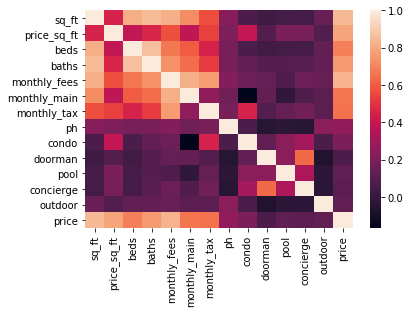

In [62]:
correlations = clean_listings_data.corr()
sns.heatmap(correlations)

In [63]:
correlations

,sq_ft,price_sq_ft,beds,baths,monthly_fees,monthly_main,monthly_tax,ph,condo,doorman,pool,concierge,outdoor,price
sq_ft,1.000000,0.450344,0.813967,0.851182,0.820521,0.724785,0.568470,0.232474,0.070545,0.029384,0.048269,0.044011,0.148282,0.849411
price_sq_ft,0.450344,1.000000,0.386116,0.461163,0.574569,0.384587,0.536256,0.204368,0.397696,0.087594,0.195507,0.189130,0.080601,0.786167
beds,0.813967,0.386116,1.000000,0.865879,0.668120,0.601344,0.450321,0.185579,0.063364,0.037500,0.047581,0.044363,0.129544,0.686957
baths,0.851182,0.461163,0.865879,1.000000,0.738663,0.643082,0.522318,0.189658,0.128580,0.090814,0.093047,0.106957,0.132656,0.756794
monthly_fees,0.820521,0.574569,0.668120,0.738663,1.000000,0.819351,0.764718,0.224178,0.156238,0.137622,0.074719,0.154021,0.144990,0.831129
monthly_main,0.724785,0.384587,0.601344,0.643082,0.819351,1.000000,0.257163,0.168743,-0.165960,0.133136,-0.015511,0.078568,0.114569,0.666833
monthly_tax,0.568470,0.536256,0.450321,0.522318,0.764718,0.257163,1.000000,0.188223,0.449897,0.082341,0.143384,0.171316,0.115629,0.651488
ph,0.232474,0.204368,0.185579,0.189658,0.224178,0.168743,0.188223,1.000000,0.066081,-0.043231,-0.027621,-0.043070,0.235969,0.260345
condo,0.070545,0.397696,0.063364,0.128580,0.156238,-0.165960,0.449897,0.066081,1.000000,0.129469,0.237127,0.303578,0.062443,0.196404
doorman,0.029384,0.087594,0.037500,0.090814,0.137622,0.133136,0.082341,-0.043231,0.129469,1.000000,0.247569,0.633978,-0.065592,0.068486


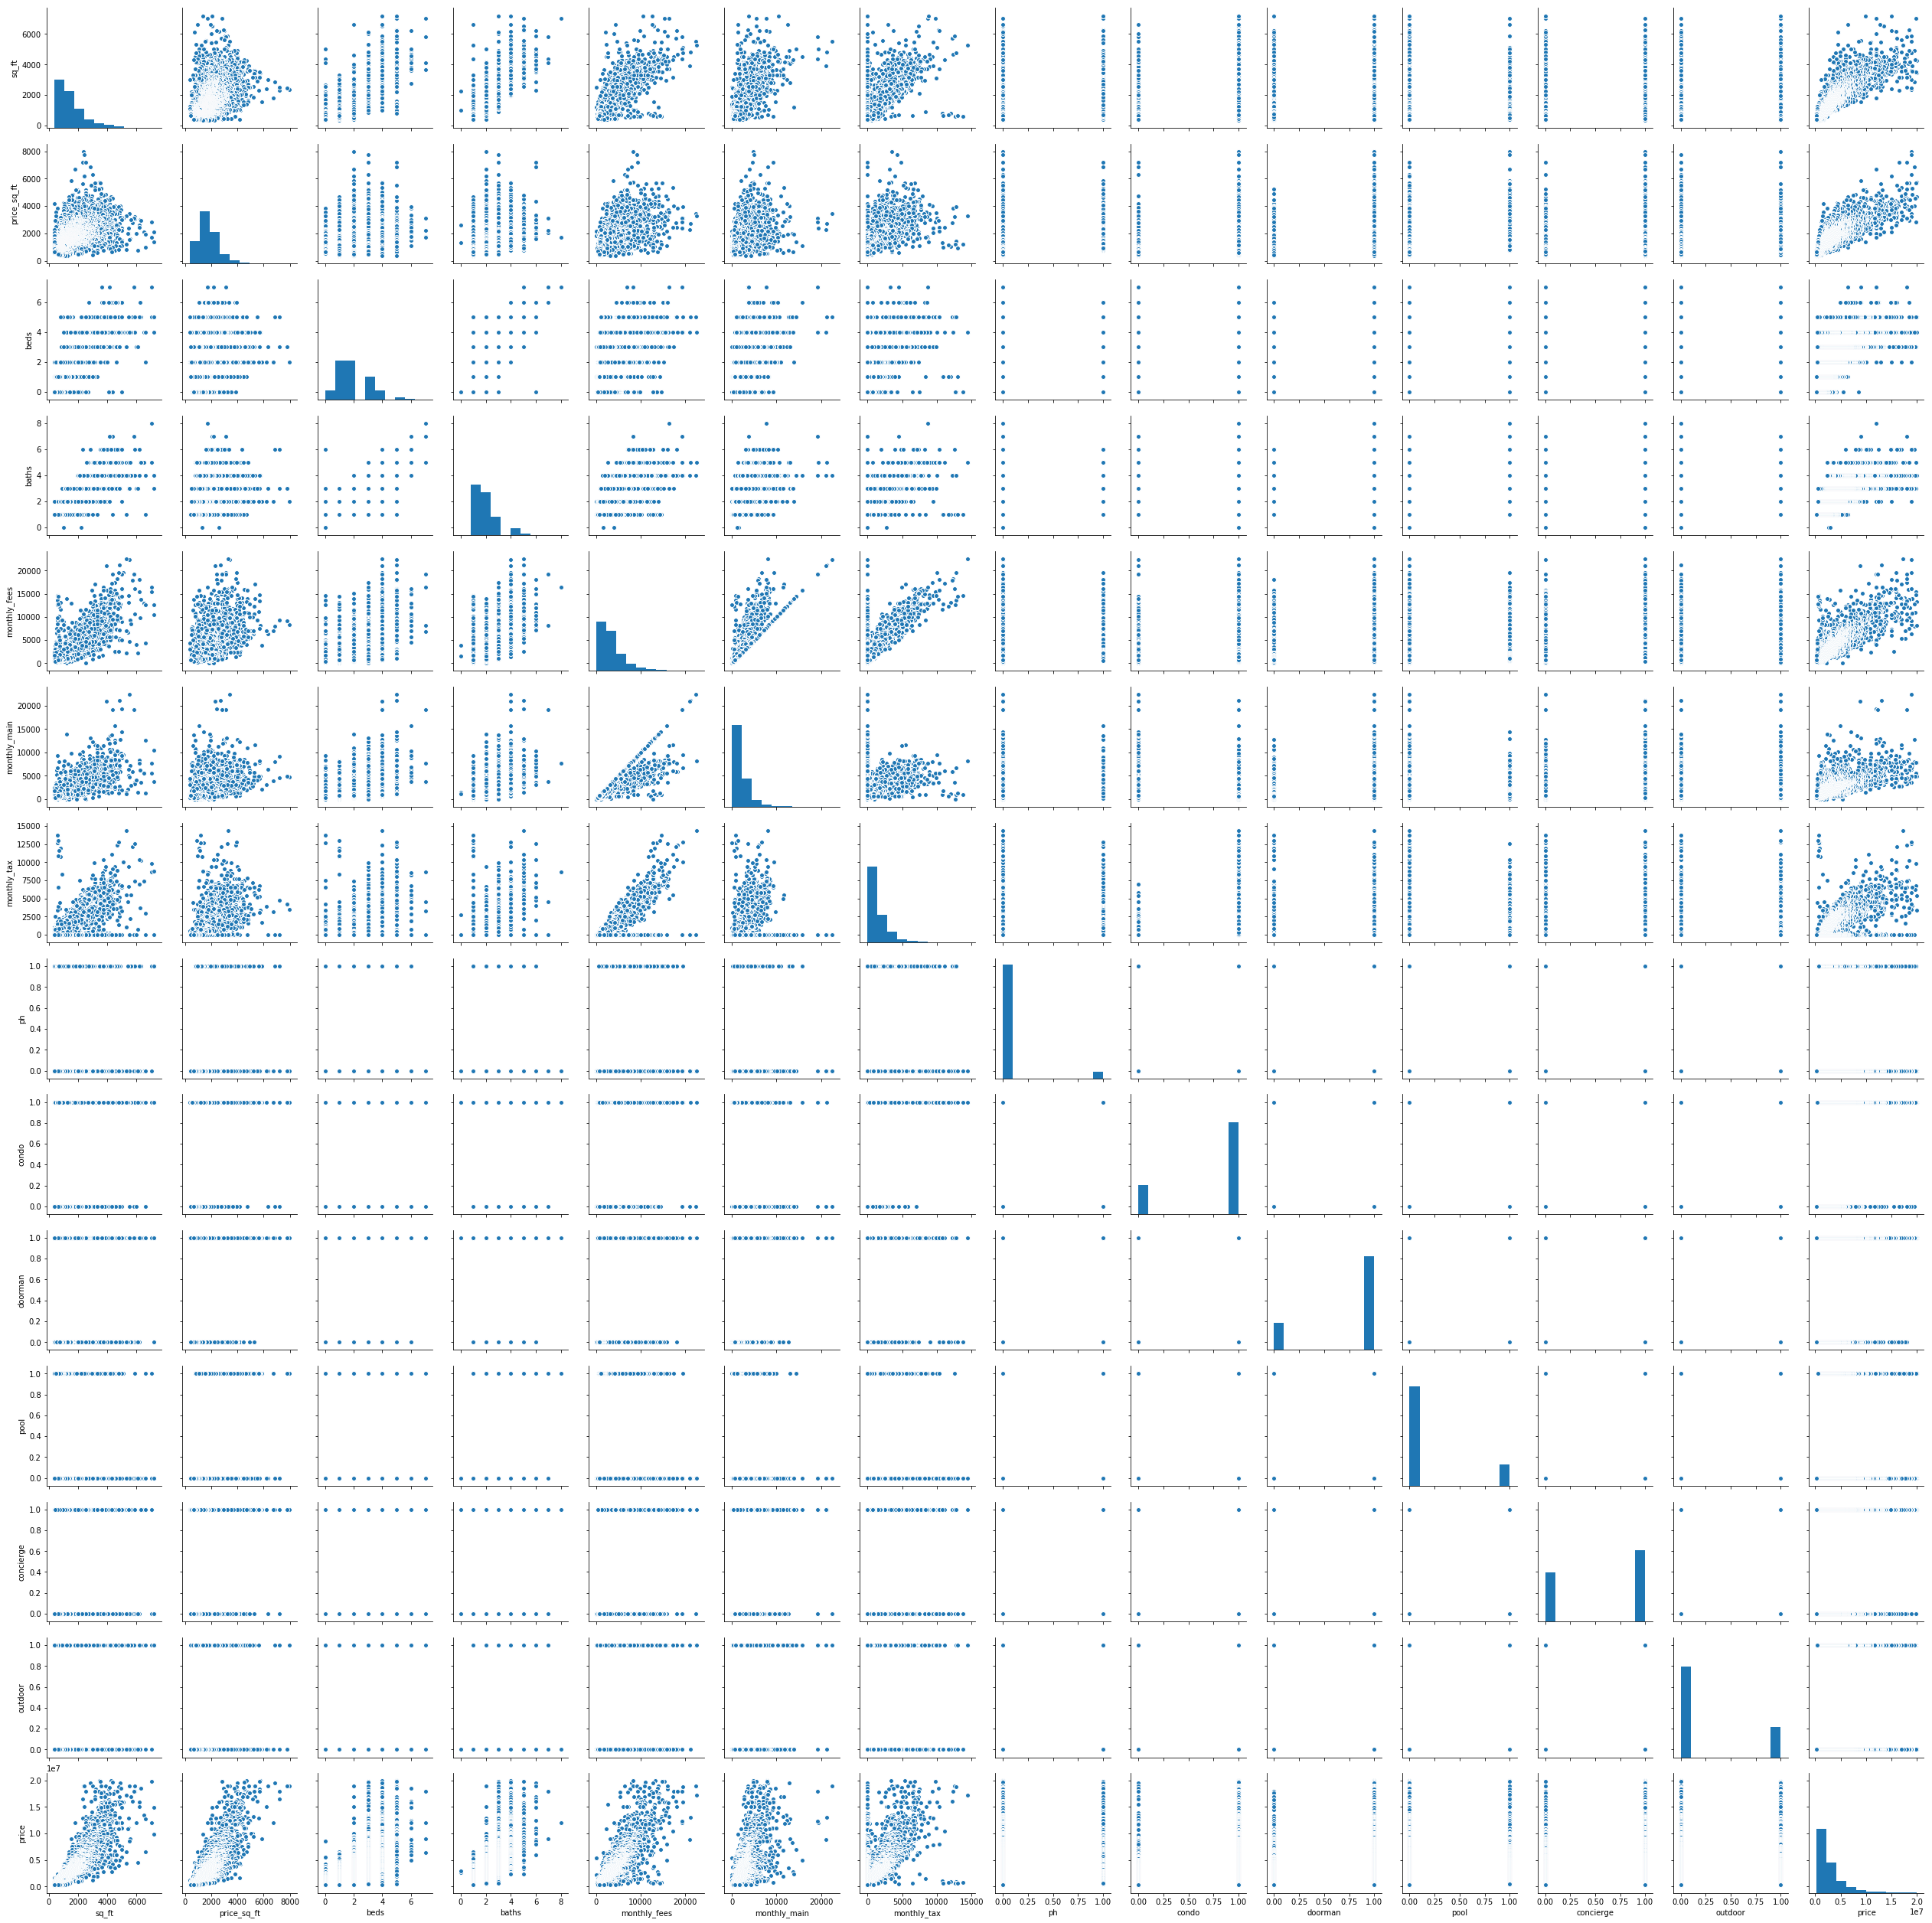

In [64]:
sns.pairplot(clean_listings_data)

Text(0.5,1,'Price vs SqFt')

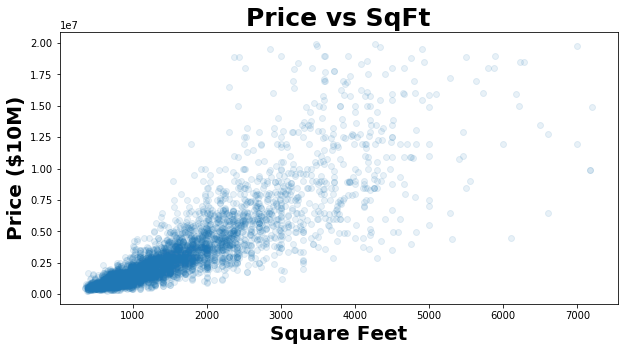

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(clean_listings_data["sq_ft"],clean_listings_data["price"], alpha=.1)
plt.xlabel("Square Feet", weight="bold", size=20)
plt.ylabel("Price ($10M)", weight="bold", size=20)
plt.title("Price vs SqFt", weight="bold", size=25)

Text(0.5,1,'Price Distribution')

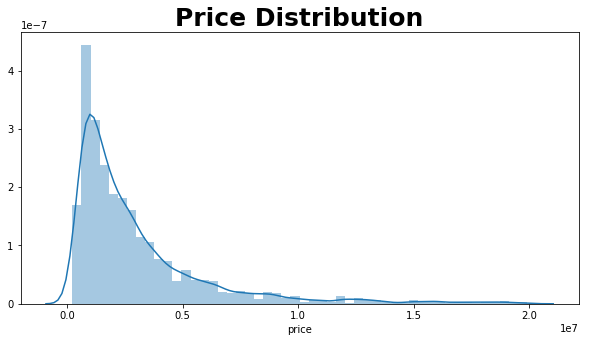

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(clean_listings_data["price"])
plt.title("Price Distribution", weight="bold", size=25)


Text(0,0.5,'Log(price)')

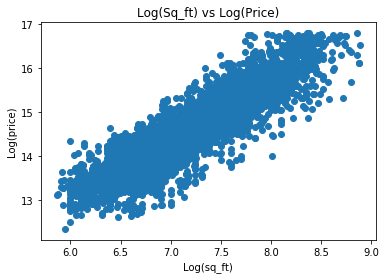

In [263]:
#plot log of sf vs log of price
plt.scatter(np.log(clean_listings_data["sq_ft"]), np.log(clean_listings_data["price"]))
plt.title("Log(Sq_ft) vs Log(Price)")
plt.xlabel("Log(sq_ft)")
plt.ylabel("Log(price)")

Text(0.5,1,'Distribution of Log(price)')

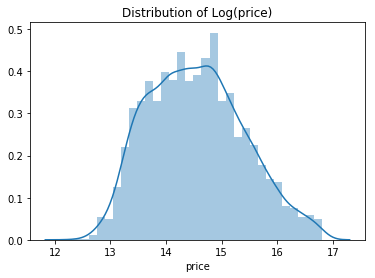

In [264]:
sns.distplot(np.log(clean_listings_data["price"]))
plt.title("Distribution of Log(price)")

Text(0,0.5,'Price($10M)')

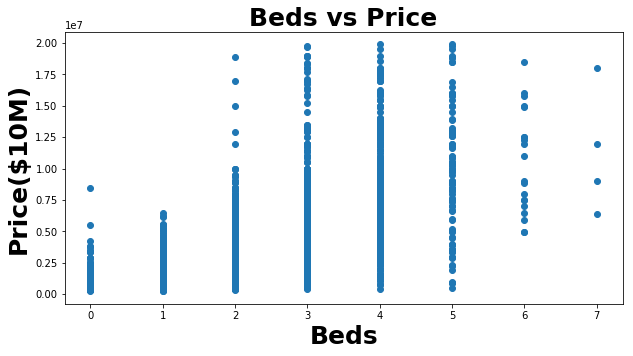

In [73]:
plt.figure(figsize=(10,5)) 
plt.scatter(clean_listings_data["beds"], clean_listings_data["price"])
plt.title("Beds vs Price", weight="bold", size=25)
plt.xlabel("Beds", weight="bold", size=25)
plt.ylabel("Price($10M)", weight="bold",size=25)

Text(0,0.5,'Price($10M)')

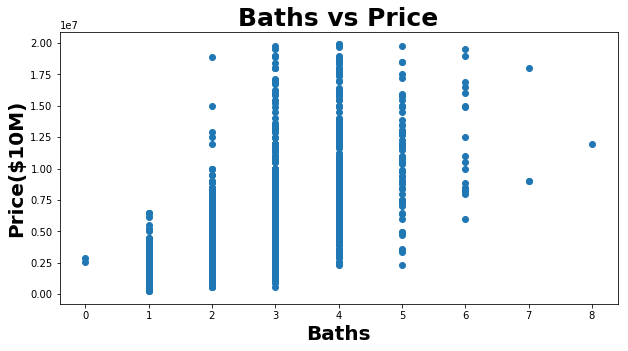

In [74]:
plt.figure(figsize=(10,5)) 
plt.scatter(clean_listings_data["baths"], clean_listings_data["price"])
plt.title("Baths vs Price", weight="bold", size=25)
plt.xlabel("Baths", weight="bold", size=20)
plt.ylabel("Price($10M)", weight="bold", size=20)

Text(0,0.5,'Price($10M)')

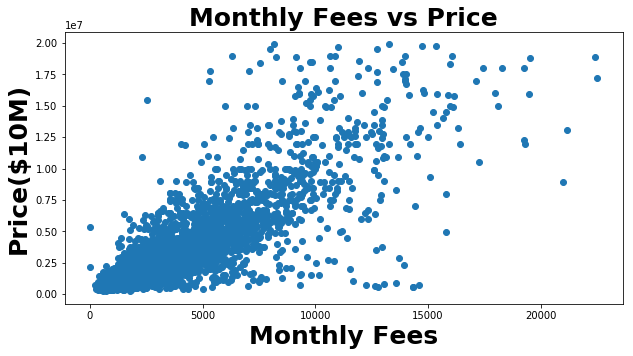

In [75]:
plt.figure(figsize=(10,5)) 
plt.scatter(clean_listings_data["monthly_fees"], clean_listings_data["price"])
plt.title("Monthly Fees vs Price", weight="bold", size=25)
plt.xlabel("Monthly Fees", weight="bold", size=25)
plt.ylabel("Price($10M)", weight="bold",size=25)

## Get Dummy Features for Later Use

In [76]:
clean_listings_data.loc[clean_listings_data["neighb"]=="Fashion Center", "neighb"]="Midtown"

In [77]:
clean_listings_data.neighb.value_counts()

Upper East Side                        769
Upper West Side                        482
Midtown                                427
Financial District                     380
TriBeCa                                298
Chelsea                                281
Gramercy - Union Square                213
SoHo - Nolita                          198
Murray Hill                            192
Clinton                                170
Flatiron District                      154
Lower East Side                        151
Harlem                                 144
East Village                           125
Turtle Bay                             121
Battery Park City                      121
Sutton Area                            103
West Village - Meatpacking District    102
Greenwich Village                       98
Lincoln Square                          94
Central Park South                      79
Carnegie Hill                           65
NoHo                                    58
Washington 

In [78]:
neighb_dummies = pd.get_dummies(clean_listings_data.neighb).astype(int)
neighb_dummies.shape

(5010, 32)

In [79]:
clean_listings_data2 = pd.concat([clean_listings_data, neighb_dummies], axis=1)

In [80]:
def get_new_devs(x):
    if type(x)==float:
        return 0
    else:
        if "sponsor" in x:
            return 1
        else:
            return 0

In [81]:
clean_listings_data2["sponsor"] = clean_listings_data2["building_desc"].apply(lambda x: get_new_devs(x))

## Set Up Train-Test Split

In [83]:
clean_listings_data2.columns

Index(['address', 'sq_ft', 'ext_sq_ft', 'price_sq_ft', 'beds', 'baths',
       'beds_baths', 'monthly_fees', 'monthly_main', 'monthly_tax', 'neighb',
       'extras', 'building_dets', 'building_desc', 'ph', 'condo', 'doorman',
       'pool', 'concierge', 'outdoor', 'price', 'Battery Park City', 'Beekman',
       'Carnegie Hill', 'Central Park South', 'Chelsea', 'Clinton',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy - Union Square', 'Greenwich Village',
       'Hamilton Heights', 'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay',
       'Lincoln Square', 'Little Italy - Chinatown', 'Lower East Side',
       'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo',
       'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District', 'sponsor'],
      dtype='object')

In [84]:
X = clean_listings_data2[["sq_ft","beds","baths","monthly_fees","ph","condo","doorman","sponsor","pool","concierge","outdoor",'Battery Park City', 'Beekman', 'Carnegie Hill',
       'Central Park South', 'Chelsea', 'Clinton', 'East Harlem',
       'East Village', 'Financial District', 'Flatiron District',
       'Gramercy - Union Square', 'Greenwich Village', 'Hamilton Heights',
       'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay', 'Lincoln Square',
       'Little Italy - Chinatown', 'Lower East Side', 'Midtown',
       'Morningside Heights', 'Murray Hill', 'NoHo', 'SoHo - Nolita',
       'Sutton Area', 'TriBeCa', 'Turtle Bay', 'Upper East Side',
       'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District']]
y = clean_listings_data2["price"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4008, 43)
(1002, 43)
(4008,)
(1002,)


In [87]:
model_scores = {}
for i in range(1,7):
    model_scores[("model_" + str(i))] = []
    if i >2:
        model_scores[("model_" + str(i)+ "_lasso")] = []
        model_scores[("model_" + str(i) + "_ridge")] = []
model_scores

{'model_1': [],
 'model_2': [],
 'model_3': [],
 'model_3_lasso': [],
 'model_3_ridge': [],
 'model_4': [],
 'model_4_lasso': [],
 'model_4_ridge': [],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

## Linear Regression w/ 1 Variable

In [88]:
cols_1 = ["sq_ft"]
X_train1 = X_train[cols_1]
X_test1 = X_test[cols_1]

In [89]:
from sklearn.model_selection import cross_val_score
lr_model1 = LinearRegression()
scores = cross_val_score(lr_model1, X_train1, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model1, X_train1, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model1, X_train1, y_train, cv=10, scoring='neg_mean_absolute_error')

In [90]:
print(-scores_mae)

[ 899807.30265077  940221.92483225  920569.66991396 1009569.96108711
  906005.98711253  902360.51978285 1036885.53509052  828578.12313745
  960265.60296015 1024660.63028038]


In [91]:
scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_1"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.724389696108686
1610426.9288138752
942892.5256847976


In [92]:
X_train1 = np.array(X_train1).reshape(-1,1)
X_test1 = np.array(X_test1).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [93]:
print(X_train1.shape, X_test1.shape, y_train.shape, y_test.shape)

(4008, 1) (1002, 1) (4008, 1) (1002, 1)


In [94]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
print("Intercept: ", lr_model1.intercept_)
print("Coefficient: ", lr_model1.coef_)

Intercept:  [-1149910.05086616]
Coefficient:  [[2782.29237554]]


In [96]:
lr_model1.score(X_train1,y_train)

0.72791635476124

Text(0,0.5,'Price ($10M)')

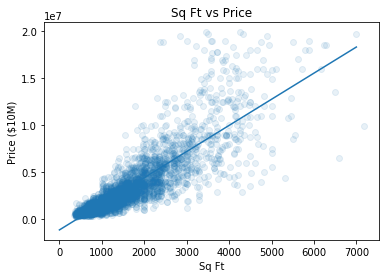

In [98]:
#take a look at regression w/ 1 variable
plt.scatter(X_train1,y_train,alpha=.1)
vec1 = np.linspace(0,7000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)
plt.title("Sq Ft vs Price")
plt.xlabel("Sq Ft")
plt.ylabel("Price ($10M)")

In [99]:
#get predictions for train data
train_set_pred1 = lr_model1.predict(X_train1)

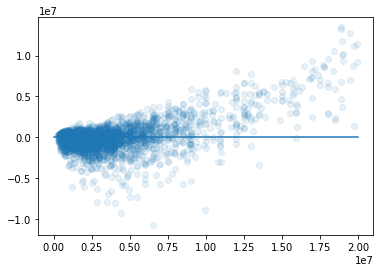

In [101]:
## Residual Plot
## Plot predicted vs actual 

plt.scatter(y_train,y_train-train_set_pred1,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,0,1000))

## Linear Regression against Log Price

In [102]:
X_train2 = np.log(X_train["sq_ft"])
X_test2 = np.log(X_test["sq_ft"])
y_train2 = np.log(y_train)
y_test2 = np.log(y_test)

In [103]:
X_train2 = np.array(X_train2).reshape(-1,1)
X_test2 = np.array(X_test2).reshape(-1,1)
y_train2 = np.array(y_train2).reshape(-1,1)
y_test2 = np.array(y_test2).reshape(-1,1)

In [104]:
lr_model2 = LinearRegression()
scores = cross_val_score(lr_model2, X_train2, y_train2, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model2, X_train2, y_train2, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model2, X_train2, y_train2, cv=10, scoring='neg_mean_absolute_error')

In [105]:
scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_2"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.8006869133230727
0.3793733500956388
0.2955633067179579


In [106]:
lr_model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print("Intercept: ", lr_model2.intercept_)
print("Coefficient: ", lr_model2.coef_)

Intercept:  [4.95106564]
Coefficient:  [[1.34230957]]


In [108]:
lr_model2.score(X_train2,y_train2)

0.8030821275178961

In [109]:
#get predictions for train data
train_set_pred2 = lr_model2.predict(X_train2)

Text(0.5,1,'Regression with Training Data')

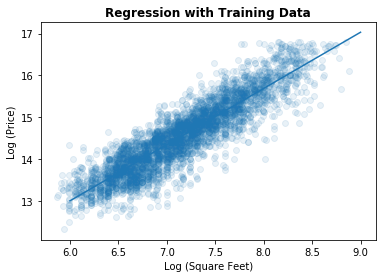

In [265]:
plt.scatter(X_train2,y_train2,alpha=.1)
vec1 = np.linspace(6,9,1000)
plt.plot(vec1, lr_model2.intercept_ + lr_model2.coef_[0]*vec1)
plt.xlabel("Log (Square Feet)")
plt.ylabel("Log (Price)")
plt.title("Regression with Training Data", weight="bold")

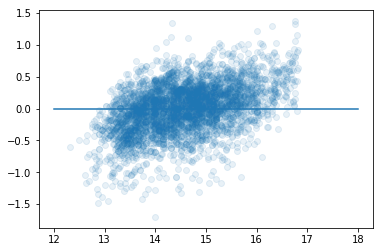

In [111]:
plt.scatter(y_train2,y_train2-train_set_pred2,alpha=.1)
plt.plot(np.linspace(12,18,1000),np.linspace(0,0,1000))

In [112]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [],
 'model_3_lasso': [],
 'model_3_ridge': [],
 'model_4': [],
 'model_4_lasso': [],
 'model_4_ridge': [],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

## Linear Regression w/ Multiple Variables

In [113]:
clean_listings_data2.columns #sq_ft, beds, baths, monthly_fees

Index(['address', 'sq_ft', 'ext_sq_ft', 'price_sq_ft', 'beds', 'baths',
       'beds_baths', 'monthly_fees', 'monthly_main', 'monthly_tax', 'neighb',
       'extras', 'building_dets', 'building_desc', 'ph', 'condo', 'doorman',
       'pool', 'concierge', 'outdoor', 'price', 'Battery Park City', 'Beekman',
       'Carnegie Hill', 'Central Park South', 'Chelsea', 'Clinton',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy - Union Square', 'Greenwich Village',
       'Hamilton Heights', 'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay',
       'Lincoln Square', 'Little Italy - Chinatown', 'Lower East Side',
       'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo',
       'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District', 'sponsor'],
      dtype='object')

In [114]:
cols = ["sq_ft", "beds", "baths", "monthly_fees", "ph","condo","doorman","sponsor", "pool", "concierge", "outdoor"]
X_train3 = X_train.loc[:,cols]
X_test3 = X_test.loc[:,cols]

In [115]:
print(X_train3.shape)
print(X_test3.shape)
print(y_train.shape)
print(y_test.shape)

(4008, 11)
(1002, 11)
(4008, 1)
(1002, 1)


In [116]:
lr_model3 = LinearRegression()
scores = cross_val_score(lr_model3, X_train3, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model3, X_train3, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model3, X_train3, y_train, cv=10, scoring='neg_mean_absolute_error')

In [117]:
scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_3"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.7944947508397582
1393342.0673943176
822316.6056544103


In [118]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
lr_model3.coef_

array([[ 1.74976854e+03, -1.76924441e+05,  1.86090149e+05,
         4.05264704e+02,  6.91722694e+05,  6.06966222e+05,
        -1.88171493e+05,  4.41787726e+05,  4.96003932e+05,
         2.50940447e+04, -1.64160725e+05]])

In [121]:
list(zip(X_train3.columns,lr_model3.coef_[0]))

[('sq_ft', 1749.7685406594335),
 ('beds', -176924.44149302138),
 ('baths', 186090.14875212917),
 ('monthly_fees', 405.2647040245065),
 ('ph', 691722.6943212056),
 ('condo', 606966.221804122),
 ('doorman', -188171.49320443932),
 ('sponsor', 441787.72594827093),
 ('pool', 496003.93239405693),
 ('concierge', 25094.044726133507),
 ('outdoor', -164160.72528858937)]

In [122]:
lr_model3.score(X_train3,y_train) 

0.7972725979192101

In [123]:
train_set_pred3 = lr_model3.predict(X_train3)

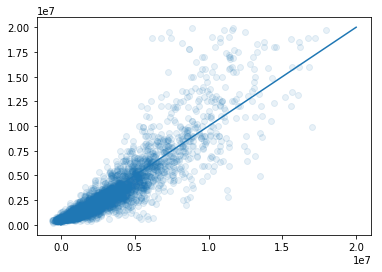

In [124]:
#look at predicted vs actual
plt.scatter(train_set_pred3,y_train,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,20000000,1000))

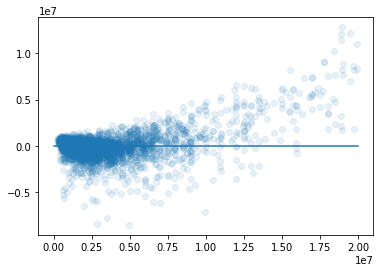

In [125]:
#residual plot
plt.scatter(y_train, y_train-train_set_pred3,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,0,1000))

## Trying Regularization

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
std = StandardScaler()
std.fit(X_train3)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [128]:
X_tr3 = std.transform(X_train3)
X_te3 = std.transform(X_test3)

In [129]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [130]:
#use CV to find optimal alpha
lr_model3_lasso1 = LassoCV(cv=5)
lr_model3_lasso1.fit(X_tr3,y_train)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [132]:
lr_model3_lasso1.alpha_

3041.4271578469734

In [133]:
#plug in optimal alpha to lasso model/ use CV to see if it improves out of sample score
lr_model3_lasso2 = Lasso(alpha=3041.4271578469734)

In [134]:
scores = cross_val_score(lr_model3_lasso2, X_tr3, y_train, cv=10)
scores_rmse = cross_val_score(lr_model3_lasso2, X_tr3, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model3_lasso2, X_tr3, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_3_lasso"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.794525198642155
1393272.8421664587
821007.4787408639


In [135]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [],
 'model_4': [],
 'model_4_lasso': [],
 'model_4_ridge': [],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

In [139]:
lr_model3_lasso2.fit(X_tr3, y_train)

Lasso(alpha=3041.4271578469734, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
train_set_pred31 = lr_model3_lasso2.predict(X_tr3)

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y_train, train_set_pred31)), mean_absolute_error(y_train,train_set_pred31)

(1396088.1991011975, 817969.8133636944)

In [143]:
lr_model3_lasso2.score(X_tr3,y_train)

0.7972483153491307

In [145]:
list(zip(X_train3.columns,lr_model3_lasso2.coef_))

[('sq_ft', 1655710.7934951156),
 ('beds', -179829.572711454),
 ('baths', 167542.62762743523),
 ('monthly_fees', 1130371.7332666998),
 ('ph', 155512.64645256015),
 ('condo', 258958.14401230298),
 ('doorman', -69742.83658301567),
 ('sponsor', 72956.67390796536),
 ('pool', 187927.2312082364),
 ('concierge', 5479.23627158228),
 ('outdoor', -67133.71866615422)]

In [146]:
lr_model3_ridge1 = RidgeCV()

In [147]:
lr_model3_ridge1.fit(X_tr3,y_train)


RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [148]:
lr_model3_ridge1.alpha_

10.0

In [149]:
lr_model3_ridge2 = Ridge(alpha=10.0)
scores = cross_val_score(lr_model3_ridge2, X_tr3, y_train, cv=10)
scores_rmse = cross_val_score(lr_model3_ridge2, X_tr3, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model3_ridge2, X_tr3, y_train, cv=10, scoring='neg_mean_absolute_error')


scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_3_ridge"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.7945346117284496
1393260.8707588583
821995.3652105834


In [150]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [],
 'model_4_lasso': [],
 'model_4_ridge': [],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

## Check for non-linear relationships

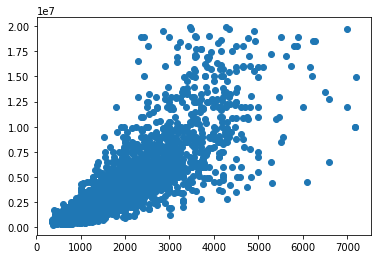

In [153]:
plt.scatter(clean_listings_data2["sq_ft"], clean_listings_data2["price"])

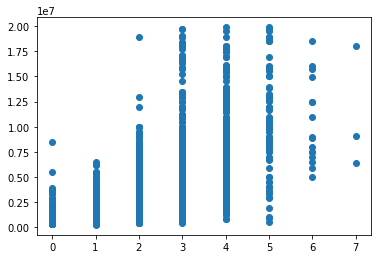

In [154]:
plt.scatter(X_train["beds"], y_train)

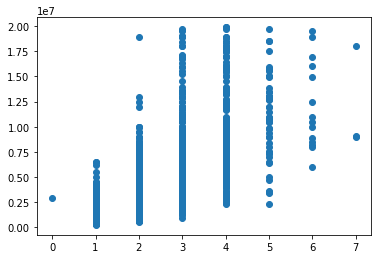

In [155]:
plt.scatter(X_train["baths"], y_train)

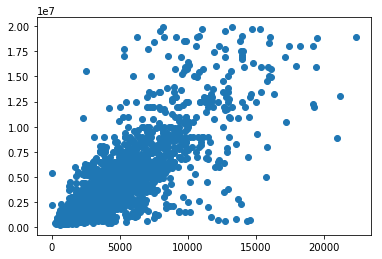

In [156]:
plt.scatter(X_train["monthly_fees"], y_train)

## Model w/ Neighborhood

In [157]:
clean_listings_data2.columns

Index(['address', 'sq_ft', 'ext_sq_ft', 'price_sq_ft', 'beds', 'baths',
       'beds_baths', 'monthly_fees', 'monthly_main', 'monthly_tax', 'neighb',
       'extras', 'building_dets', 'building_desc', 'ph', 'condo', 'doorman',
       'pool', 'concierge', 'outdoor', 'price', 'Battery Park City', 'Beekman',
       'Carnegie Hill', 'Central Park South', 'Chelsea', 'Clinton',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy - Union Square', 'Greenwich Village',
       'Hamilton Heights', 'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay',
       'Lincoln Square', 'Little Italy - Chinatown', 'Lower East Side',
       'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo',
       'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District', 'sponsor'],
      dtype='object')

In [158]:
#set up variables for 4th model
cols = ["sq_ft", "beds", "baths", "monthly_fees", "ph", "condo", "doorman", "pool", "concierge","outdoor",'Battery Park City', 'Beekman',
       'Carnegie Hill', 'Central Park South', 'Chelsea', 'Clinton',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy - Union Square', 'Greenwich Village',
       'Hamilton Heights', 'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay',
       'Lincoln Square', 'Little Italy - Chinatown', 'Lower East Side',
       'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo',
       'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District']

X_train4 = X_train[["sq_ft", "beds", "baths", "monthly_fees", "ph", "condo", "doorman","pool","concierge","outdoor",'Battery Park City', 'Beekman',
       'Carnegie Hill', 'Central Park South', 'Chelsea', 'Clinton',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy - Union Square', 'Greenwich Village',
       'Hamilton Heights', 'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay',
       'Lincoln Square', 'Little Italy - Chinatown', 'Lower East Side',
       'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo',
       'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District']]
X_test4 = X_test[["sq_ft", "beds", "baths", "monthly_fees", "ph", "condo", "doorman","pool","concierge","outdoor",'Battery Park City', 'Beekman',
       'Carnegie Hill', 'Central Park South', 'Chelsea', 'Clinton',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy - Union Square', 'Greenwich Village',
       'Hamilton Heights', 'Harlem', 'Hudson Heights', 'Inwood', 'Kips Bay',
       'Lincoln Square', 'Little Italy - Chinatown', 'Lower East Side',
       'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo',
       'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District']]
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [159]:
lr_model4 = LinearRegression()
scores = cross_val_score(lr_model4, X_train4, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model4, X_train4, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model4, X_train4, y_train, cv=10, scoring='neg_mean_absolute_error')

In [160]:
scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_4"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.8048625773128117
1357938.2675429515
800071.3410060832


In [161]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [],
 'model_4_ridge': [],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

In [162]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
lr_model4.coef_

array([[ 1.68437426e+03, -1.71065549e+05,  2.01464238e+05,
         4.01324632e+02,  7.14976696e+05,  5.68297335e+05,
        -1.19963428e+05,  4.94681727e+05,  4.51117316e+04,
        -1.18118106e+05, -3.57427295e+05, -1.00810523e+06,
         9.54739217e+05,  2.07466206e+06,  7.20028294e+05,
         3.77982484e+05,  3.36049514e+05,  8.32062781e+05,
         3.03008820e+05,  7.24256634e+05,  4.24087514e+05,
         7.61272185e+05,  3.02178338e+05,  3.48470809e+05,
         2.94259910e+05,  5.61866175e+05,  4.08962767e+05,
         1.07247151e+06,  1.79110588e+05,  8.82604581e+05,
         2.74844324e+05,  7.95488403e+05,  3.04500298e+05,
         1.41810242e+06,  7.78148559e+05,  8.94228525e+04,
         6.97299420e+05,  9.88299298e+04,  3.08085830e+05,
         7.21718236e+05,  5.92588153e+05,  1.02679640e+06]])

In [164]:
list(zip(X_train4.columns,lr_model4.coef_[0]))

[('sq_ft', 1684.374257198434),
 ('beds', -171065.5488153816),
 ('baths', 201464.23829099335),
 ('monthly_fees', 401.3246323148487),
 ('ph', 714976.6958114512),
 ('condo', 568297.3347319814),
 ('doorman', -119963.42764926085),
 ('pool', 494681.72692943003),
 ('concierge', 45111.73164621822),
 ('outdoor', -118118.10607780391),
 ('Battery Park City', -357427.29467766517),
 ('Beekman', -1008105.2278417661),
 ('Carnegie Hill', 954739.2174659781),
 ('Central Park South', 2074662.0594955618),
 ('Chelsea', 720028.2940732776),
 ('Clinton', 377982.48391487665),
 ('East Harlem', 336049.5137189731),
 ('East Village', 832062.7811965087),
 ('Financial District', 303008.8204674494),
 ('Flatiron District', 724256.6340375831),
 ('Gramercy - Union Square', 424087.5140298296),
 ('Greenwich Village', 761272.1847381305),
 ('Hamilton Heights', 302178.3377843371),
 ('Harlem', 348470.8094363506),
 ('Hudson Heights', 294259.9101256508),
 ('Inwood', 561866.1749170029),
 ('Kips Bay', 408962.76713936403),
 ('Linc

In [165]:
lr_model4.score(X_train4,y_train) 

0.8105317855298466

In [166]:
train_set_pred4 = lr_model4.predict(X_train4)

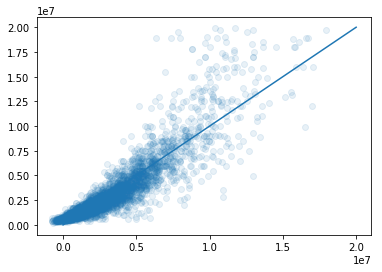

In [167]:
#predicted vs actual
plt.scatter(train_set_pred4,y_train,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,20000000,1000))

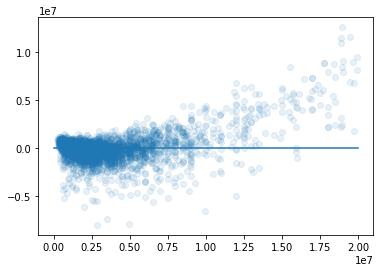

In [168]:
#redidual plot
plt.scatter(y_train, y_train-train_set_pred4,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,0,1000))

In [169]:
std = StandardScaler()
std.fit(X_train4)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [170]:
X_tr4 = std.transform(X_train4)
X_te4 = std.transform(X_test4)

In [171]:
lr_model4_lasso1 = LassoCV(cv=5)
lr_model4_lasso1.fit(X_tr4,y_train)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [172]:
lr_model4_lasso1.alpha_

2645.278237072045

In [173]:
lr_model4_lasso2 = Lasso(alpha=2645.278237072045)

In [174]:
lr_model4_lasso2 = Lasso(alpha=2645.278237072045)
scores = cross_val_score(lr_model4_lasso2, X_tr4, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model4_lasso2, X_tr4, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model4_lasso2, X_tr4, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_4_lasso"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.8049019623151986
1357813.9041413465
798244.6385000034


In [175]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

In [176]:
lr_model4_ridge1 = RidgeCV()

In [177]:
lr_model4_ridge1.fit(X_tr4, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [178]:
lr_model4_ridge1.alpha_

10.0

In [179]:
lr_model4_ridge2 = Ridge(alpha=10.0)
scores = cross_val_score(lr_model4_ridge2, X_tr4, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model4_ridge2, X_tr4, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model4_ridge2, X_tr4, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_4_ridge"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

0.8048952161036407
1357876.4344216392
800005.9659086383


In [180]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

## Polynomial Features

In [181]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)

In [182]:
cols = ["sq_ft", "beds", "baths", "monthly_fees", "ph","condo","doorman","concierge","sponsor"]
X_train5 = X_train.loc[:,cols]
X_test5 = X_test.loc[:,cols]

In [183]:
X_train5 = p.fit_transform(X_train5)

In [184]:
X_test5 = p.transform(X_test5)

In [185]:
lr_model5 = LinearRegression()
scores = cross_val_score(lr_model5, X_train5, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model5, X_train5, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model5, X_train5, y_train, cv=10, scoring='neg_mean_absolute_error')

In [186]:
scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_5"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores

0.8003024148833671
1374494.7539513235
752377.3523759539


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

In [187]:
lr_model5 = LinearRegression()
lr_model5.fit(X_train5,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
train_set_pred5 = lr_model5.predict(X_train5)

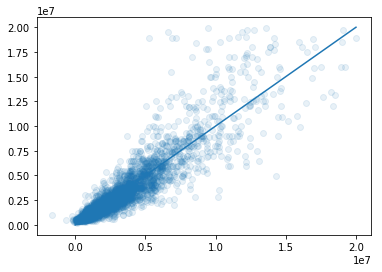

In [189]:
plt.scatter(train_set_pred5,y_train,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,20000000,1000))

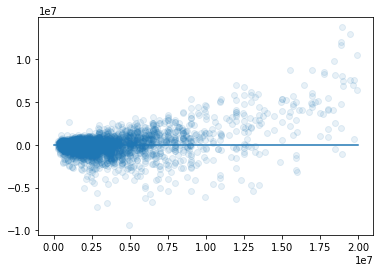

In [190]:
plt.scatter(y_train, y_train-train_set_pred5,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,0,1000))

In [191]:
std = StandardScaler()
std.fit(X_train5)

X_tr5 = std.transform(X_train5)
X_te5 = std.transform(X_test5)


In [192]:

lr_model5_lasso1 = LassoCV(cv=5)
lr_model5_lasso1.fit(X_tr5,y_train)

lr_model5_lasso1.alpha_



/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4020.5877100199814

In [193]:
lr_model5_lasso2 = Lasso(alpha=4020.5877100199814)
scores = cross_val_score(lr_model5_lasso2, X_tr5, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model5_lasso2, X_tr5, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model5_lasso2, X_tr5, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_5_lasso"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores



0.8074348837144096
1350371.1144418959
734783.7357743273


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

In [194]:
lr_model5_ridge1 = RidgeCV()

lr_model5_ridge1.fit(X_tr5, y_train)

lr_model5_ridge1.alpha_



10.0

In [195]:
lr_model5_ridge2 = Ridge(alpha=10.0)
scores = cross_val_score(lr_model5_ridge2, X_tr5, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model5_ridge2, X_tr5, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model5_ridge2, X_tr5, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_5_ridge"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores

0.8039306481957572
1361950.1301368885
742983.8467468388


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [0.8039306481957572, 1361950.1301368885, 742983.8467468388],
 'model_6': [],
 'model_6_lasso': [],
 'model_6_ridge': []}

## Polynomial Features w/ Neighborhoods

In [196]:
X_train6 = X_train4
X_test6 = X_test4

In [197]:
X_train6["sq_ft^2"] = (X_train6["sq_ft"])**2

X_train6["beds^2"] = (X_train6["beds"])**2

X_train6["baths^2"] = (X_train6["baths"])**2

X_train6["fees^2"] = (X_train6["monthly_fees"])**2

X_train6["sq_ft_beds"] = (X_train6["sq_ft"])*(X_train6["beds"])

X_train6["sq_ft_baths"] = (X_train6["sq_ft"])*(X_train6["baths"])

X_train6["sq_ft_fees"] = (X_train6["sq_ft"])*(X_train6["monthly_fees"])

X_train6["beds_baths"] = (X_train6["beds"])*(X_train6["baths"])

X_train6["beds_fees"] = (X_train6["beds"])*(X_train6["monthly_fees"])

X_train6["baths_fees"] = (X_train6["baths"])*(X_train6["monthly_fees"])

In [198]:
X_test6["sq_ft^2"] = (X_test6["sq_ft"])**2

X_test6["beds^2"] = (X_test6["beds"])**2

X_test6["baths^2"] = (X_test6["baths"])**2

X_test6["fees^2"] = (X_test6["monthly_fees"])**2

X_test6["sq_ft_beds"] = (X_test6["sq_ft"])*(X_test6["beds"])

X_test6["sq_ft_baths"] = (X_test6["sq_ft"])*(X_test6["baths"])

X_test6["sq_ft_fees"] = (X_test6["sq_ft"])*(X_test6["monthly_fees"])

X_test6["beds_baths"] = (X_test6["beds"])*(X_test6["baths"])

X_test6["beds_fees"] = (X_test6["beds"])*(X_test6["monthly_fees"])

X_test6["baths_fees"] = (X_test6["baths"])*(X_test6["monthly_fees"])

In [199]:
lr_model6 = LinearRegression()
scores = cross_val_score(lr_model6, X_train6, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model6, X_train6, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model6, X_train6, y_train, cv=10, scoring='neg_mean_absolute_error')

In [200]:
scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_6"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores

0.814472498919691
1325732.782571821
745328.1799969323


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [0.8039306481957572, 1361950.1301368885, 742983.8467468388],
 'model_6': [0.814472498919691, 1325732.782571821, 745328.1799969323],
 'model_6_lasso': [],
 'model_6_ridge': []}

In [201]:
lr_model6.fit(X_train6, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [202]:
train_set_pred6 = lr_model6.predict(X_train6)

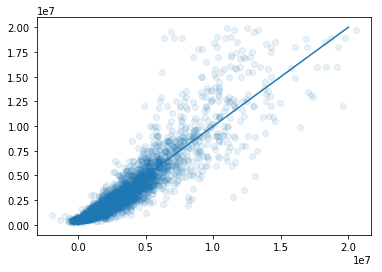

In [203]:
plt.scatter(train_set_pred6,y_train,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,20000000,1000))

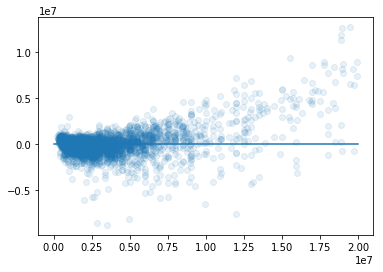

In [204]:
plt.scatter(y_train, y_train-train_set_pred6,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,0,1000))

In [205]:
lr_model6.score(X_train6, y_train)

0.8262317194033325

In [206]:
std2 = StandardScaler()

In [207]:
std2.fit(X_train6)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [208]:
X_tr6 = std2.transform(X_train6)
X_te6 = std2.transform(X_test6)

In [209]:
lr_model6_lasso1 = LassoCV(cv=5)
lr_model6_lasso1.fit(X_tr6,y_train)

lr_model6_lasso1.alpha_



/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


3041.4271578469734

In [210]:
lr_model6_lasso2 = Lasso(alpha=3041.4271578469734)
scores = cross_val_score(lr_model6_lasso2, X_tr6, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model6_lasso2, X_tr6, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model6_lasso2, X_tr6, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_6_lasso"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores


/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.

0.8173360916223178
1315876.2417357576
740306.6699373352


/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [0.8039306481957572, 1361950.1301368885, 742983.8467468388],
 'model_6': [0.814472498919691, 1325732.782571821, 745328.1799969323],
 'model_6_lasso': [0.8173360916223178, 1315876.2417357576, 740306.6699373352],
 'model_6_ri

In [213]:
lr_model6_ridge1 = RidgeCV(cv=5)
lr_model6_ridge1.fit(X_tr6,y_train)

lr_model6_ridge1.alpha_

10.0

In [214]:
lr_model6_ridge2 = Ridge(alpha=10.0)
scores = cross_val_score(lr_model6_ridge2, X_tr6, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model6_ridge2, X_tr6, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model6_ridge2, X_tr6, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_6_ridge"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores

0.8168732970788442
1317322.6552282479
742219.8846063842


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [0.8039306481957572, 1361950.1301368885, 742983.8467468388],
 'model_6': [0.814472498919691, 1325732.782571821, 745328.1799969323],
 'model_6_lasso': [0.8173360916223178, 1315876.2417357576, 740306.6699373352],
 'model_6_ri

In [215]:
lr_model6_lasso2 = Lasso(alpha=3041.4271578469734)
scores = cross_val_score(lr_model6_lasso2, X_tr6, y_train, cv=10) #scoring='neg_mean_squared_error')
scores_rmse = cross_val_score(lr_model6_lasso2, X_tr6, y_train, cv=10, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(lr_model6_lasso2, X_tr6, y_train, cv=10, scoring='neg_mean_absolute_error')

scores_avg = sum(scores)/len(scores)
new_scores = [np.sqrt(-score) for score in scores_rmse]
scores_rmse_avg = sum(new_scores)/len(new_scores)
new_scores2 = [-x for x in scores_mae]
scores_mae_avg = sum(new_scores2)/len(new_scores2)

model_scores["model_6_lasso"] = [scores_avg, scores_rmse_avg, scores_mae_avg]
print(scores_avg)
print(scores_rmse_avg)
print(scores_mae_avg)

model_scores


/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.

0.8173360916223178
1315876.2417357576
740306.6699373352


/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [0.8039306481957572, 1361950.1301368885, 742983.8467468388],
 'model_6': [0.814472498919691, 1325732.782571821, 745328.1799969323],
 'model_6_lasso': [0.8173360916223178, 1315876.2417357576, 740306.6699373352],
 'model_6_ri

In [216]:
lr_model6_lasso2.fit(X_tr6, y_train)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=3041.4271578469734, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [217]:
X_tr6.shape

(4008, 52)

In [218]:
train_set_pred_final = lr_model6_lasso2.predict(X_tr6)

In [219]:
train_set_pred_final.shape

(4008,)

In [220]:
train_set_pred_final = np.array(train_set_pred_final).reshape(-1,1)

In [221]:
y_train.shape

(4008, 1)

Text(0.5,0,'Price')

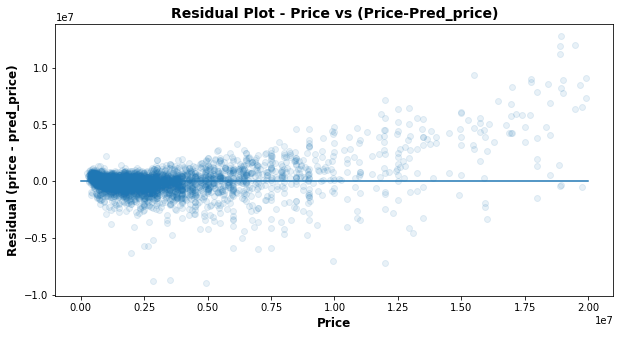

In [222]:
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_train-train_set_pred_final,alpha=.1)
plt.plot(np.linspace(0,20000000,1000),np.linspace(0,0,1000))
plt.title("Residual Plot - Price vs (Price-Pred_price)", weight="bold", size=14)
plt.ylabel("Residual (price - pred_price)", weight="bold", size=12)
plt.xlabel("Price", weight="bold", size=12)

In [223]:
X_te6.shape

(1002, 52)

In [224]:
test_set_pred_final = lr_model6_lasso2.predict(X_te6)

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model6_lasso2.score(X_te6, y_test),np.sqrt(mean_squared_error(y_test, test_set_pred_final)), mean_absolute_error(y_test,test_set_pred_final)

(0.7982972001864672, 1357049.632523945, 734472.7120949696)

## Predict on Less Expensive Apartments

In [225]:
clean_listings_data2.shape

(5010, 54)

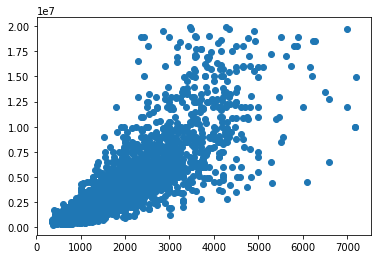

In [227]:
plt.scatter(clean_listings_data2["sq_ft"], clean_listings_data2["price"])

In [228]:
smaller_data = clean_listings_data2[(clean_listings_data2["sq_ft"]<2500) & (clean_listings_data2["price"]<3000000)]

In [229]:
smaller_data.shape

(3387, 54)

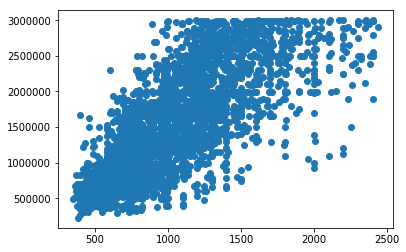

In [230]:
plt.scatter(smaller_data["sq_ft"], smaller_data["price"])

In [231]:
X_test.shape

(1002, 43)

In [232]:
y_test.shape

(1002, 1)

In [234]:
y_test10 = pd.DataFrame(y_test)

In [235]:
X_test.reset_index(inplace=True)


In [236]:
total_test = pd.merge(X_test, y_test10, how="inner", left_index=True, right_index=True)

In [237]:
total_test.shape

(1002, 45)

In [238]:
total_test.rename(columns={0: "price"}, inplace=True)

In [239]:
total_test.columns

Index(['index', 'sq_ft', 'beds', 'baths', 'monthly_fees', 'ph', 'condo',
       'doorman', 'sponsor', 'pool', 'concierge', 'outdoor',
       'Battery Park City', 'Beekman', 'Carnegie Hill', 'Central Park South',
       'Chelsea', 'Clinton', 'East Harlem', 'East Village',
       'Financial District', 'Flatiron District', 'Gramercy - Union Square',
       'Greenwich Village', 'Hamilton Heights', 'Harlem', 'Hudson Heights',
       'Inwood', 'Kips Bay', 'Lincoln Square', 'Little Italy - Chinatown',
       'Lower East Side', 'Midtown', 'Morningside Heights', 'Murray Hill',
       'NoHo', 'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District', 'price'],
      dtype='object')

In [240]:
total_test = total_test[total_test["price"]<3000000]

In [244]:
total_test = total_test[total_test["sq_ft"]<2500]

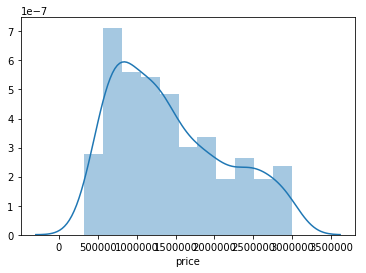

In [245]:
sns.distplot(total_test["price"])

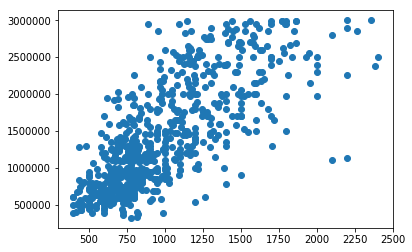

In [266]:
plt.scatter(total_test["sq_ft"], total_test["price"])

In [247]:
total_test.head()

,index,sq_ft,beds,baths,monthly_fees,ph,condo,doorman,sponsor,pool,...,NoHo,SoHo - Nolita,Sutton Area,TriBeCa,Turtle Bay,Upper East Side,Upper West Side,Washington Heights,West Village - Meatpacking District,price
0,1143,971.0,1,1,2806.0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2160000
1,1983,650.0,1,1,1440.0,False,1,1,0,0,...,0,0,0,0,0,1,0,0,0,855000
3,6903,675.0,1,1,1281.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,875000
4,4530,1674.0,2,2,5135.0,False,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2650000
5,7185,600.0,1,1,1327.0,False,1,1,0,0,...,0,0,0,0,0,0,0,0,0,785000


In [248]:
#get the polynomial features needed for the model
total_test["sq_ft^2"] = (total_test["sq_ft"])**2

total_test["beds^2"] = (total_test["beds"])**2

total_test["baths^2"] = (total_test["baths"])**2

total_test["fees^2"] = (total_test["monthly_fees"])**2

total_test["sq_ft_beds"] = (total_test["sq_ft"])*(total_test["beds"])

total_test["sq_ft_baths"] = (total_test["sq_ft"])*(total_test["baths"])

total_test["sq_ft_fees"] = (total_test["sq_ft"])*(total_test["monthly_fees"])

total_test["beds_baths"] = (total_test["beds"])*(total_test["baths"])

total_test["beds_fees"] = (total_test["beds"])*(total_test["monthly_fees"])

total_test["baths_fees"] = (total_test["baths"])*(total_test["monthly_fees"])

In [250]:
total_test.columns

Index(['index', 'sq_ft', 'beds', 'baths', 'monthly_fees', 'ph', 'condo',
       'doorman', 'sponsor', 'pool', 'concierge', 'outdoor',
       'Battery Park City', 'Beekman', 'Carnegie Hill', 'Central Park South',
       'Chelsea', 'Clinton', 'East Harlem', 'East Village',
       'Financial District', 'Flatiron District', 'Gramercy - Union Square',
       'Greenwich Village', 'Hamilton Heights', 'Harlem', 'Hudson Heights',
       'Inwood', 'Kips Bay', 'Lincoln Square', 'Little Italy - Chinatown',
       'Lower East Side', 'Midtown', 'Morningside Heights', 'Murray Hill',
       'NoHo', 'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District', 'price', 'sq_ft^2', 'beds^2',
       'baths^2', 'fees^2', 'sq_ft_beds', 'sq_ft_baths', 'sq_ft_fees',
       'beds_baths', 'beds_fees', 'baths_fees'],
      dtype='object')

In [251]:
x_cols = ['sq_ft', 'beds', 'baths', 'monthly_fees', 'ph', 'condo',
       'doorman',  'pool', 'concierge', 'outdoor',
       'Battery Park City', 'Beekman', 'Carnegie Hill', 'Central Park South',
       'Chelsea', 'Clinton', 'East Harlem', 'East Village',
       'Financial District', 'Flatiron District', 'Gramercy - Union Square',
       'Greenwich Village', 'Hamilton Heights', 'Harlem', 'Hudson Heights',
       'Inwood', 'Kips Bay', 'Lincoln Square', 'Little Italy - Chinatown',
       'Lower East Side', 'Midtown', 'Morningside Heights', 'Murray Hill',
       'NoHo', 'SoHo - Nolita', 'Sutton Area', 'TriBeCa', 'Turtle Bay',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village - Meatpacking District', 'sq_ft^2', 'beds^2',
       'baths^2', 'fees^2', 'sq_ft_beds', 'sq_ft_baths', 'sq_ft_fees',
       'beds_baths', 'beds_fees', 'baths_fees']
total_test_x = total_test[x_cols]

In [252]:
total_test_x_tr = std2.transform(total_test_x)

In [253]:
total_test_y = total_test["price"]

In [254]:
test_set_pred_final_small = lr_model6_lasso2.predict(total_test_x_tr)

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model6_lasso2.score(total_test_x_tr, total_test_y),np.sqrt(mean_squared_error(total_test_y, test_set_pred_final_small)), mean_absolute_error(total_test_y,test_set_pred_final_small)


(0.30013045779624237, 598239.5014377729, 423056.79879881995)

In [257]:
model_scores

{'model_1': [0.724389696108686, 1610426.9288138752, 942892.5256847976],
 'model_2': [0.8006869133230727, 0.3793733500956388, 0.2955633067179579],
 'model_3': [0.7944947508397582, 1393342.0673943176, 822316.6056544103],
 'model_3_lasso': [0.794525198642155, 1393272.8421664587, 821007.4787408639],
 'model_3_ridge': [0.7945346117284496, 1393260.8707588583, 821995.3652105834],
 'model_4': [0.8048625773128117, 1357938.2675429515, 800071.3410060832],
 'model_4_lasso': [0.8049019623151986, 1357813.9041413465, 798244.6385000034],
 'model_4_ridge': [0.8048952161036407, 1357876.4344216392, 800005.9659086383],
 'model_5': [0.8003024148833671, 1374494.7539513235, 752377.3523759539],
 'model_5_lasso': [0.8074348837144096, 1350371.1144418959, 734783.7357743273],
 'model_5_ridge': [0.8039306481957572, 1361950.1301368885, 742983.8467468388],
 'model_6': [0.814472498919691, 1325732.782571821, 745328.1799969323],
 'model_6_lasso': [0.8173360916223178, 1315876.2417357576, 740306.6699373352],
 'model_6_ri